# Analysis Report: Socioeconomic Factors and Healthcare Burden during COVID-19 in the Americas

### 1. Introduction
In recent years, the COVID-19 pandemic has highlighted significant disparities in healthcare systems and socioeconomic development across the Americas. Variations in factors such as GDP per capita and healthcare expenditure have led to differing outcomes, including mortality rates, ICU occupancy, and overall healthcare resilience. While wealthier nations generally demonstrated better pandemic management, economically disadvantaged countries faced heightened healthcare burdens and resource constraints.

This project seeks to understand how these socioeconomic factors influenced COVID-19 outcomes in the Americas by addressing two key questions:

1. What are the patterns in the correlation between socioeconomic factors and COVID-19 outcomes in the Americas?
2. How can these insights guide future policy decisions to improve healthcare resilience?

### 2. Used Data
The ETL pipeline produces a structured SQLite database containing two tables: covid_data and socioeconomic_data. The tabular data can be retrieved through SQL execution that selects all rows from the respective tables.

2.1 Table covid_data:

In [57]:
import pandas as pd
import sqlite3
import os
print(os.getcwd())
os.chdir('/Users/wangyulin/MADE/made-yulinwang')
db_path = './data/database.sqlite'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

df_covid = pd.read_sql_query("SELECT * FROM covid_deaths", conn)
df_covid.head()

/Users/wangyulin/MADE/made-yulinwang


,Country/Region,Date,Deaths,Country,Country Code,GDP per Capita,Healthcare Expenditure Per Capita,Urbanization Rate,Population Density
0,Argentina,2020-01-22 00:00:00.000000,0,Argentina,ARG,8500.837939,10.347015,41626771.0,16.513367
1,Argentina,2020-01-23 00:00:00.000000,0,Argentina,ARG,8500.837939,10.347015,41626771.0,16.513367
2,Argentina,2020-01-24 00:00:00.000000,0,Argentina,ARG,8500.837939,10.347015,41626771.0,16.513367
3,Argentina,2020-01-25 00:00:00.000000,0,Argentina,ARG,8500.837939,10.347015,41626771.0,16.513367
4,Argentina,2020-01-26 00:00:00.000000,0,Argentina,ARG,8500.837939,10.347015,41626771.0,16.513367


Through data transformation, the covid_deaths table comprises several thousand entries with the following columns:

- Columns:
  - Country/Region: Name of the country or region.
  - Date: Date of the observation.
  - Deaths: Cumulative number of deaths reported for COVID-19.
  - GDP per Capita: Average income per person in USD.
  - Healthcare Expenditure Per Capita: Annual healthcare spending per person.
  - Urbanization Rate: Percentage of people living in urban areas.
  - Population Density: Number of people per square kilometer.

Several columns in this table may contain missing values, particularly socioeconomic indicators such as Healthcare Expenditure Per Capita. Imputing these values can introduce bias, so caution is necessary when interpreting results. Nevertheless, the table provides critical data for understanding the correlation between mortality and socioeconomic factors.

2.2 Table world_bank_data：

In [58]:
import pandas as pd

world_bank_data = pd.read_sql_query("SELECT * FROM world_bank_data", conn)
world_bank_data.head()

,Country,Country Code,GDP per Capita,Healthcare Expenditure Per Capita,Urbanization Rate,Population Density
0,Argentina,ARG,8500.837939,10.347015,41626771.0,16.513367
1,Belize,BLZ,5185.158070,5.309744,179871.0,17.133363
2,Bolivia,BOL,3068.812555,8.022581,8285943.0,10.907689
3,Brazil,BRA,6923.699912,10.182350,181687255.0,24.964985
4,Barbados,BRB,17028.413783,7.372766,87864.0,655.111628


The world_bank_data table contains aggregated socioeconomic indicators for each country, with the following structure:

- Columns:
  - Country: Name of the country.
  - Country Code: ISO code of the country.
  - GDP per Capita: Average income per person in USD.
  - Healthcare Expenditure Per Capita: Annual healthcare spending per capita.
  - Urbanization Rate: Percentage of the population residing in urban areas.
  - Population Density: Number of people per square kilometer.

While most data in this table is complete, some countries lack data for specific indicators. These gaps may require imputation or exclusion, depending on the research context.

### 3. Analysis
Correlation Analysis

                                     Deaths  GDP per Capita  \
Deaths                             1.000000       -0.029056   
GDP per Capita                    -0.029056        1.000000   
Healthcare Expenditure Per Capita  0.132393        0.521776   
Urbanization Rate                  0.812681        0.044141   
Population Density                -0.208915       -0.022534   

                                   Healthcare Expenditure Per Capita  \
Deaths                                                      0.132393   
GDP per Capita                                              0.521776   
Healthcare Expenditure Per Capita                           1.000000   
Urbanization Rate                                           0.225925   
Population Density                                         -0.351180   

                                   Urbanization Rate  Population Density  
Deaths                                      0.812681           -0.208915  
GDP per Capita                        

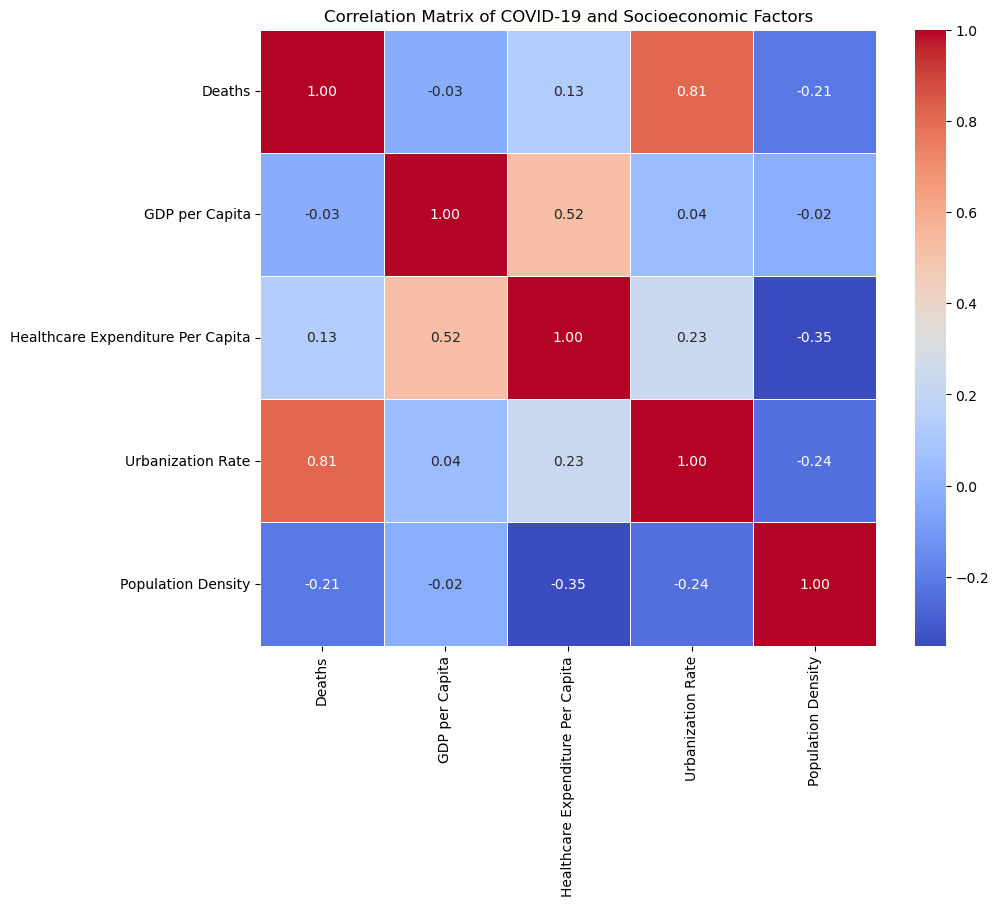

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the database
db_path = './data/database.sqlite'
conn = sqlite3.connect(db_path)

# Load the covid_deaths table
df_covid = pd.read_sql_query("SELECT * FROM covid_deaths", conn)

# Specify columns for correlation analysis
columns_to_correlate = [
    "Deaths", "GDP per Capita", "Healthcare Expenditure Per Capita",
    "Urbanization Rate", "Population Density"
]

# Filter the DataFrame
df_filtered = df_covid[columns_to_correlate]

# Compute the correlation matrix
correlation_matrix = df_filtered.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

plt.title('Correlation Matrix of COVID-19 and Socioeconomic Factors')
plt.show()

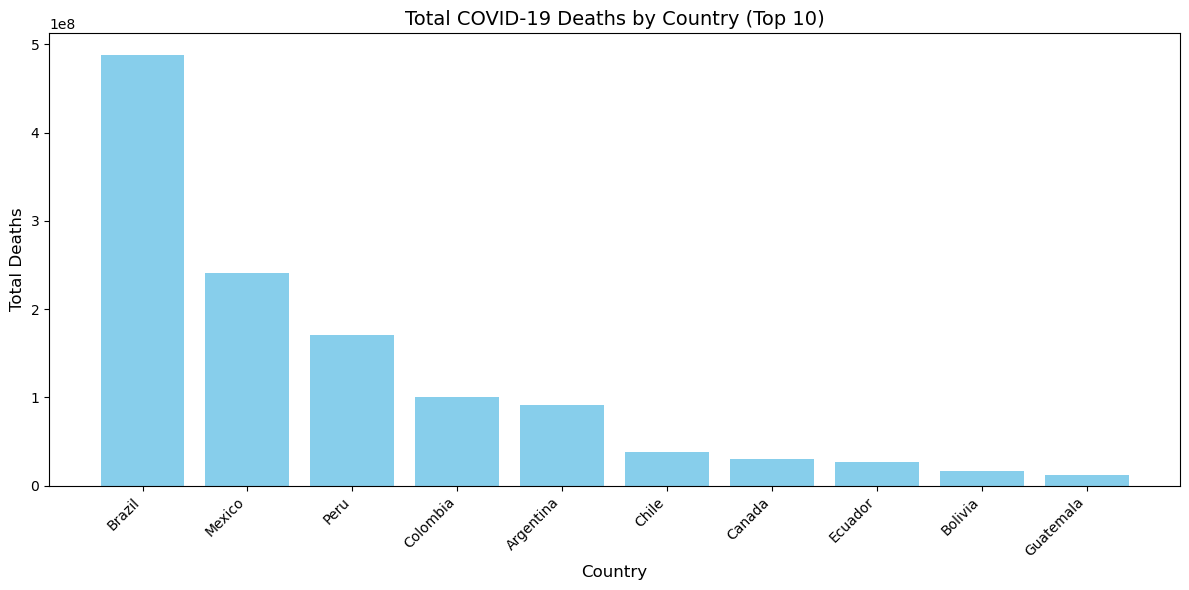

In [60]:
import matplotlib.pyplot as plt


df_deaths_grouped = df_covid.groupby('Country/Region')['Deaths'].sum().reset_index()
df_deaths_sorted = df_deaths_grouped.sort_values(by='Deaths', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(df_deaths_sorted['Country/Region'][:10], df_deaths_sorted['Deaths'][:10], color='skyblue')  # Top 10 countries
plt.title('Total COVID-19 Deaths by Country (Top 10)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


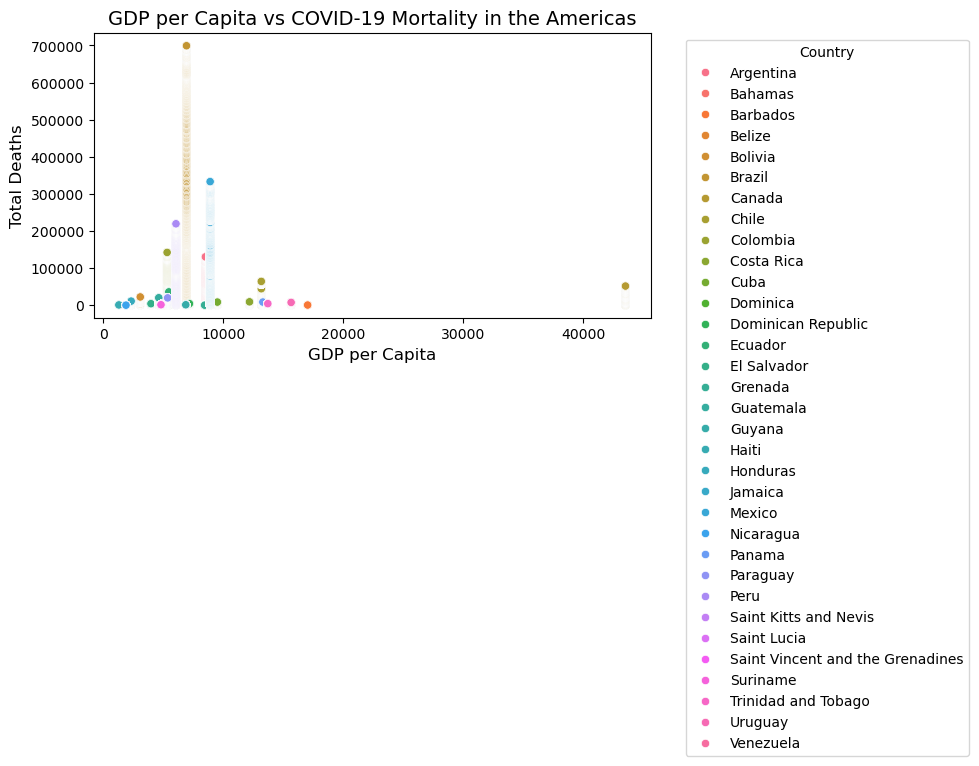

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_covid, x='GDP per Capita', y='Deaths', hue='Country/Region'
)
plt.title('GDP per Capita vs COVID-19 Mortality in the Americas', fontsize=14)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.tight_layout()
plt.show()

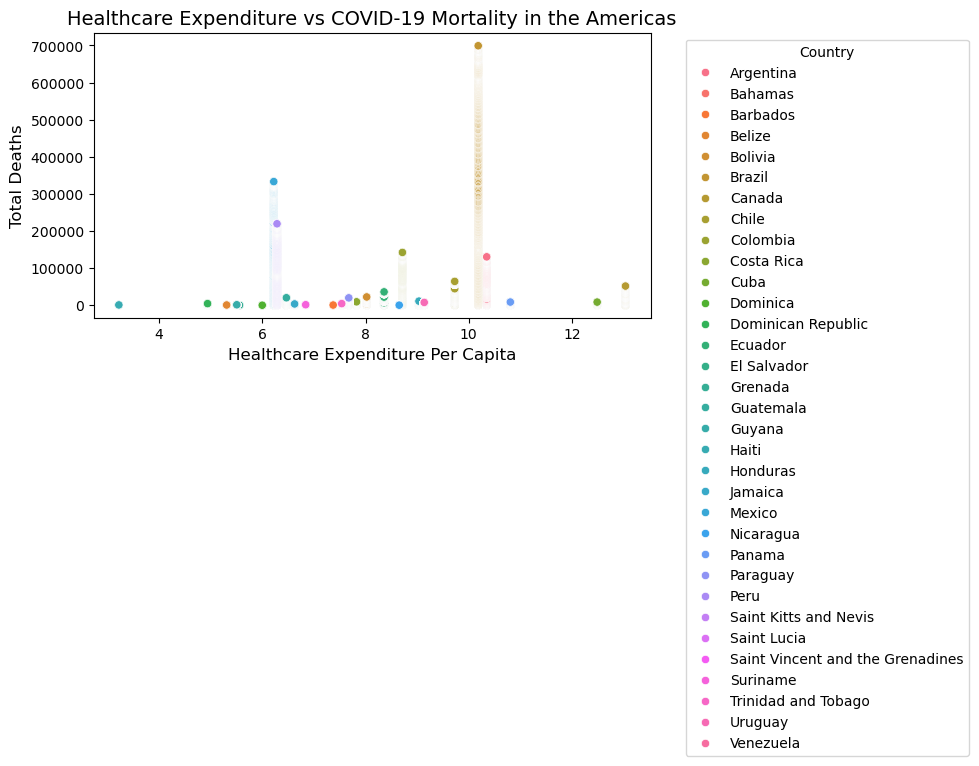

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_covid, x='Healthcare Expenditure Per Capita', y='Deaths', hue='Country/Region'
)
plt.title('Healthcare Expenditure vs COVID-19 Mortality in the Americas', fontsize=14)
plt.xlabel('Healthcare Expenditure Per Capita', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.tight_layout()
plt.show()

/var/folders/41/v19dx8nx1bg3lcczrlhwcvlr0000gn/T/ipykernel_2851/2090965094.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_mortality[:10], x='Deaths', y='Country/Region', palette='Blues_r')


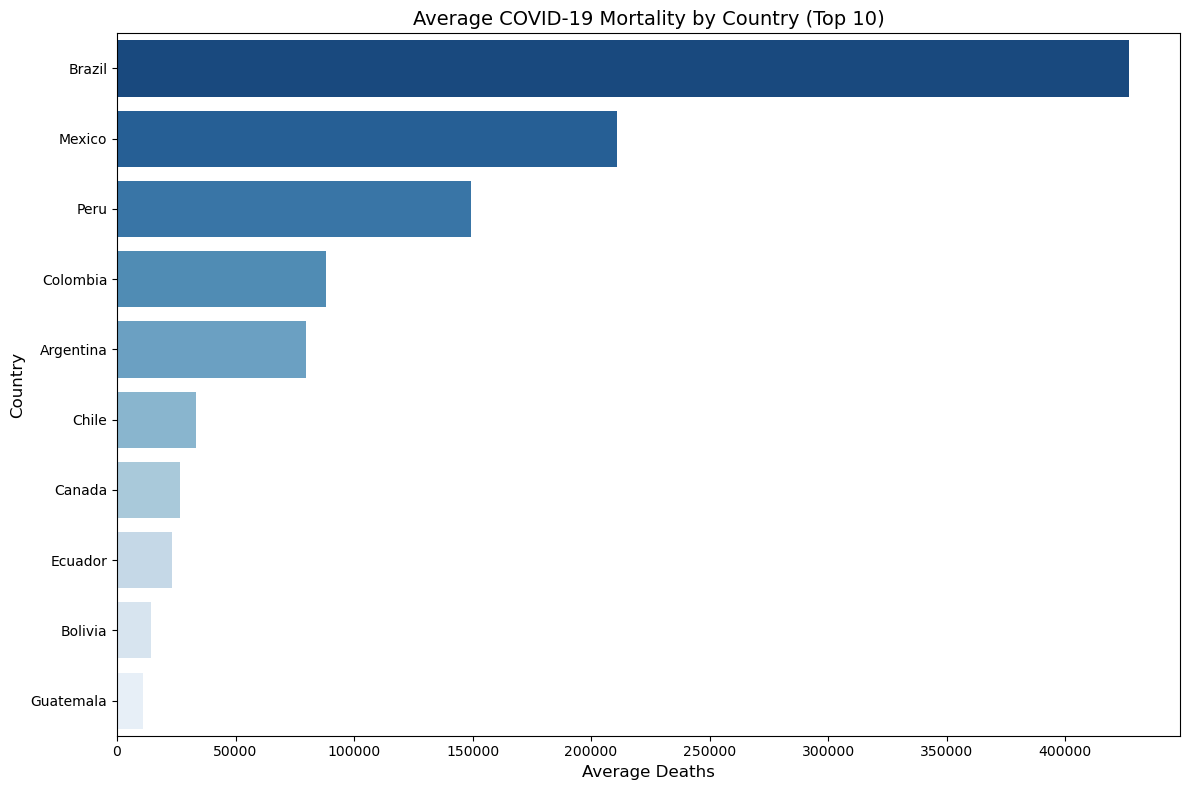

In [63]:
avg_mortality = df_covid.groupby('Country/Region')['Deaths'].mean().reset_index()
avg_mortality = avg_mortality.sort_values(by='Deaths', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_mortality[:10], x='Deaths', y='Country/Region', palette='Blues_r')
plt.title('Average COVID-19 Mortality by Country (Top 10)', fontsize=14)
plt.xlabel('Average Deaths', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

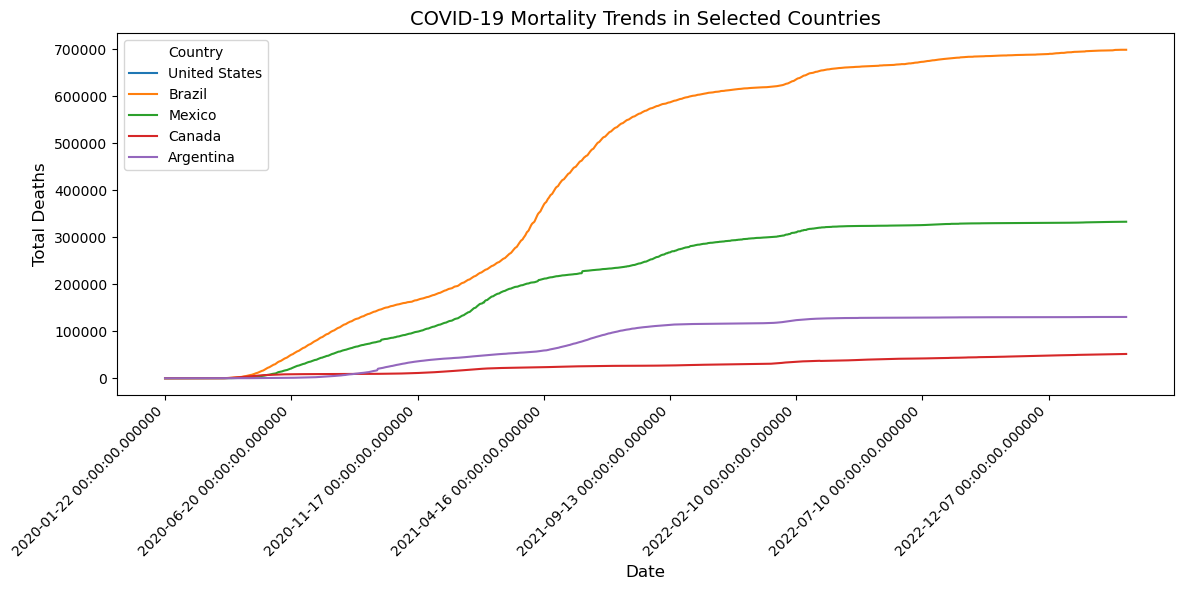

In [64]:
# Trends for selected countries with improved x-axis labels
selected_countries = ["United States", "Brazil", "Mexico", "Canada", "Argentina"]

plt.figure(figsize=(12, 6))
for country in selected_countries:
    data = df_covid[df_covid['Country/Region'] == country]
    sns.lineplot(data=data, x='Date', y='Deaths', label=country)

plt.title('COVID-19 Mortality Trends in Selected Countries', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.legend(title='Country', loc='upper left')

# Improve x-axis tick label spacing and rotation
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=False, prune='both', nbins=10))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


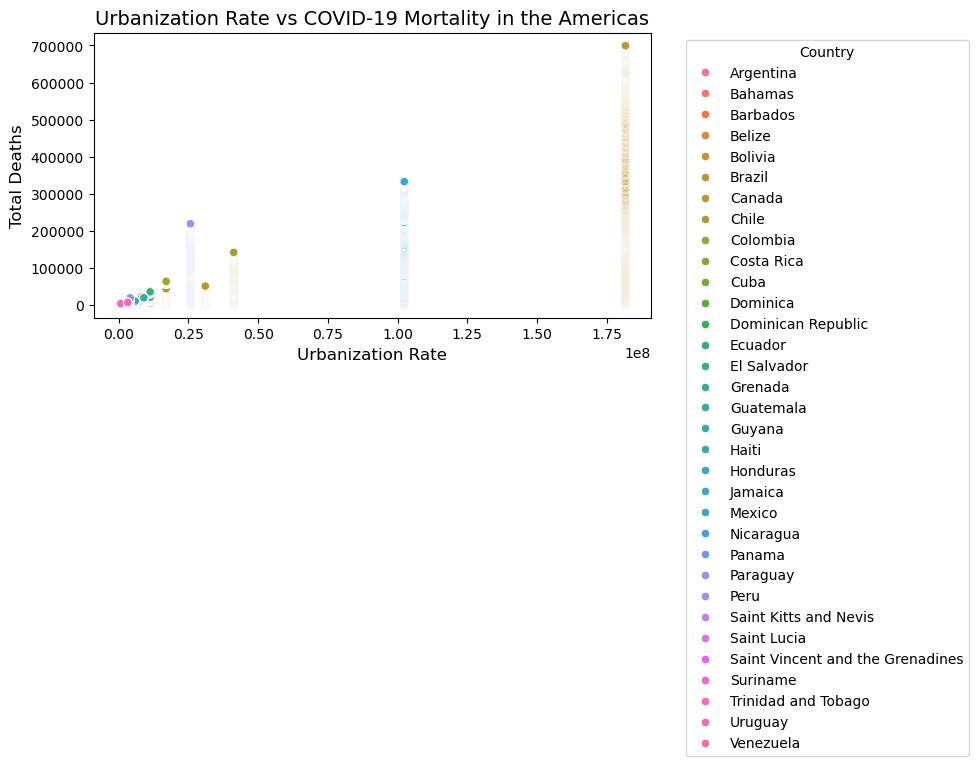

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_covid, x='Urbanization Rate', y='Deaths', hue='Country/Region'
)
plt.title('Urbanization Rate vs COVID-19 Mortality in the Americas', fontsize=14)
plt.xlabel('Urbanization Rate', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.tight_layout()
plt.show()